In [1]:
import pandas as pd

data = pd.read_csv('./creditcardfraud_normalised.csv')

data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,...,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,...,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,...,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,...,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,...,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0


In [ ]:
#Method 1: Using the Z-Score method

In [7]:
# formula for z score = (X - mean) / std deviation

import numpy as np

outliers=[]
def detect_outliers(data):
    threshold = 3
    mean = data.mean()
    std = data.std()

    for i in data:
        z_score = (i - mean) / std
        if abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [8]:
outliers = detect_outliers(data['Amount'])
# print(outliers)

size = len(outliers)
print(size)

print(outliers)

4076
[0.054608, 0.044452, 0.035794, 0.036499, 0.149002, 0.036499, 0.034297, 0.039531, 0.038391, 0.062395, 0.059511, 0.067572, 0.095443, 0.053564, 0.300198, 0.043898, 0.043174, 0.036898, 0.142812, 0.034589, 0.038145, 0.041069, 0.051423, 0.098883, 0.113267, 0.075485, 0.033091, 0.054462, 0.041595, 0.040619, 0.057607, 0.056351, 0.056649, 0.045783, 0.064224, 0.038924, 0.068883, 0.043949, 0.04552, 0.056901, 0.032772, 0.051613, 0.063077, 0.036511, 0.036511, 0.046053, 0.04552, 0.034926, 0.043362, 0.155808, 0.032919, 0.033286, 0.040261, 0.07044, 0.041065, 0.035778, 0.07576, 0.073795, 0.073795, 0.03701, 0.106898, 0.155537, 0.047837, 0.054816, 0.037307, 0.074082, 0.038301, 0.067886, 0.044373, 0.036433, 0.036923, 0.039274, 0.036824, 0.041365, 0.082757, 0.054883, 0.034409, 0.034166, 0.033777, 0.049213, 0.047444, 0.047079, 0.034391, 0.033498, 0.051626, 0.074457, 0.074457, 0.039002, 0.038924, 0.039002, 0.050003, 0.037158, 0.047895, 0.034094, 0.052547, 0.060536, 0.034899, 0.043718, 0.058005, 0.065014,

In [ ]:
#Method 2: Using IQR to detect outliers

In [4]:
#IQR for outlier detection
#formula for IQR = Q3 - Q1
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 -(1.5 * IQR)
upper_bound = Q3 +(1.5 * IQR)

outliers = data[(data['Amount'] < lower_bound) | (data['Amount'] > upper_bound)]
size = len(outliers)
print(size)

print("\n")
print(outliers)

31904


              V1        V2        V3        V4        V5        V6        V7  \
2       0.935217  0.753118  0.868141  0.268766  0.762329  0.281122  0.270177   
20      0.970099  0.752889  0.855249  0.288908  0.757697  0.276182  0.260003   
51      0.941221  0.756855  0.836754  0.416394  0.721070  0.314518  0.291988   
64      0.949414  0.777915  0.842204  0.317329  0.760957  0.266591  0.274858   
85      0.880569  0.720524  0.896376  0.292000  0.785927  0.258082  0.248874   
...          ...       ...       ...       ...       ...       ...       ...   
284735  0.930073  0.761292  0.842513  0.183257  0.750224  0.286807  0.263839   
284748  0.986056  0.762120  0.803173  0.273889  0.767491  0.255851  0.268157   
284753  0.983195  0.760737  0.788003  0.315112  0.771734  0.253385  0.274543   
284757  0.928434  0.756890  0.856328  0.189447  0.761259  0.263492  0.266411   
284806  0.949232  0.765256  0.849601  0.229488  0.765632  0.256488  0.274963   

              V8        V9     

In [ ]:
#Method 3: Using KNN (L1) to detect outliers

In [27]:
import numpy as np
import pandas as pd

# Load the dataset
data = pd.read_csv('creditcardfraud_normalised.csv')

# Choose any two columns as features using their labels
column1 = data['V1']
column2 = data['Amount']

# Function to calculate L1 distance between two vectors
def l1_distance(x1, x2):
    return np.sum(np.abs(x1 - x2))

# Calculate L1 distance between the two columns for each pair of rows
distances = [l1_distance(x1, x2) for x1, x2 in zip(column1, column2)]

# Sort the distances
distances.sort()

threshold = 0.999

outliers = []
for i in distances:
    if(i > threshold):
        outliers.append(i)

print(len(outliers))
print(outliers)


14
[0.999002, 0.999016, 0.999019, 0.999019, 0.999036, 0.999054, 0.999114, 0.999146, 0.999151, 0.999203, 0.9993129999999999, 0.999585, 0.9996759999999999, 0.999689]


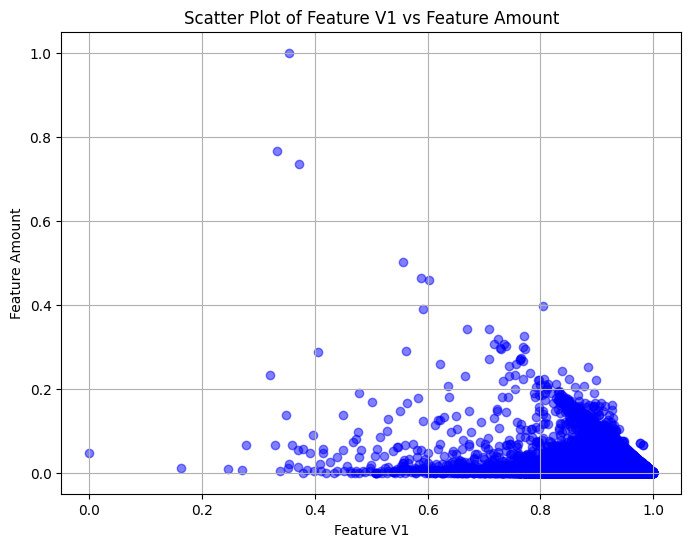

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('creditcardfraud_normalised.csv')

# Extract columns 0 and 27 as features
feature_0 = data.iloc[:, 0]
feature_27 = data.iloc[:, 28]

# Scatter plot of the two features
plt.figure(figsize=(8, 6))
plt.scatter(feature_0, feature_27, alpha=0.5, color='blue')
plt.title('Scatter Plot of Feature V1 vs Feature Amount')
plt.xlabel('Feature V1')
plt.ylabel('Feature Amount')
plt.grid(True)
plt.show()
